# 17. Segmentation & Tracking – Histogram backprojection + CamShift

In [1]:
import cv2
import numpy as np
import sys

sys.path.insert(0, '..')

from utils import show_image

### **a)** Use the histogram bakprojection technique – `cv.calcBackProject()` – to segment the sky or the grass in landscape images 

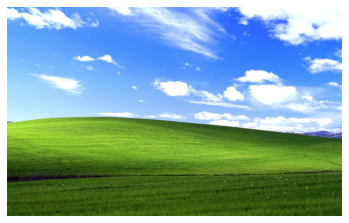

In [2]:
image = cv2.imread("Images/xp.jpg") 

show_image(image)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


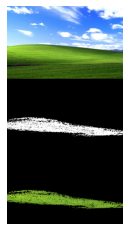

In [7]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
selection = cv2.selectROI(image)
roi = image[int(selection[1]):int(selection[1] + selection[3]), int(selection[0]):int(selection[0] + selection[2])]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculating object histogram
roi_histogram = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Normalize histogram and apply backprojection
cv2.normalize(roi_histogram, roi_histogram, 0, 255, cv2.NORM_MINMAX)
dst = cv2.calcBackProject([image], [0, 1], roi_histogram, [0, 180, 0, 256], 1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(dst, -1, disc, dst)

# Threshold and binary AND
_, threshold = cv2.threshold(dst, 0, 255, 0)
threshold = cv2.merge((threshold, threshold, threshold))
result = cv2.bitwise_and(image, threshold)
result = np.vstack((image, threshold, result))

show_image(result)